In [9]:
from mne_bids import make_bids_basename
from pathlib import Path, PurePath
import seaborn
import helper
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matlab.engine
import numpy as np
import scipy as sp
import scipy.io
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
from mne.time_frequency import psd_multitaper
%matplotlib 

# TODO 
# Power specturm analysis : drop bad channels, load data, create epochs and wavelets analysis


Using matplotlib backend: Qt5Agg


In [10]:
proc = 'BP'
subid = 'JuRo'
cfsubdir = Path('~','CIFAR_data','iEEG_10','subjects', subid, 'EEGLAB_datasets', 'bipolar_montage').expanduser()
fname = helper.CIFAR_filename(subid=subid,task='sleep',proc=proc)
fpath = cfsubdir.joinpath(fname)
fpath = os.fspath(fpath)
raw = mne.io.read_raw_eeglab(fpath)

Reading /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_BP_montage.fdt


<ipython-input-10-c151879a88de>:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath)


In [7]:
# Interesting channels to pick:
picks = ['RTo9-RTo10',  'RTo7-RTo8', 'RO1-RO2', 'RIp9-RIp10', 'RFp5-RFp6', 'RIa5-RIa6', 'RIa11-RIa12', 'RFPs9-RFPs10', 'RTp5-RTp6']

In [12]:
bad_chan = ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6']
raw.info['bads'] = bad_chan
#raw_pick = raw.copy().pick(picks=picks)

In [13]:
#raw.plot(duration=200, n_channels=20, scalings=4e-4, color='b', butterfly=False)

In [63]:
# Draft annotatation
rem_annot = mne.Annotations(onset=[10, 2360, 2840, 4100, 10660],
                            duration=[200]*5,
                            description=['stage 1', 'stage 2', 'stage 3', 'stage 2' ,'stage 1'])

In [66]:
raw.set_annotations(rem_annot)
(rem_events,
 rem_event_dict) = mne.events_from_annotations(raw, chunk_duration=20)

Used Annotations descriptions: ['stage 1', 'stage 2', 'stage 3']


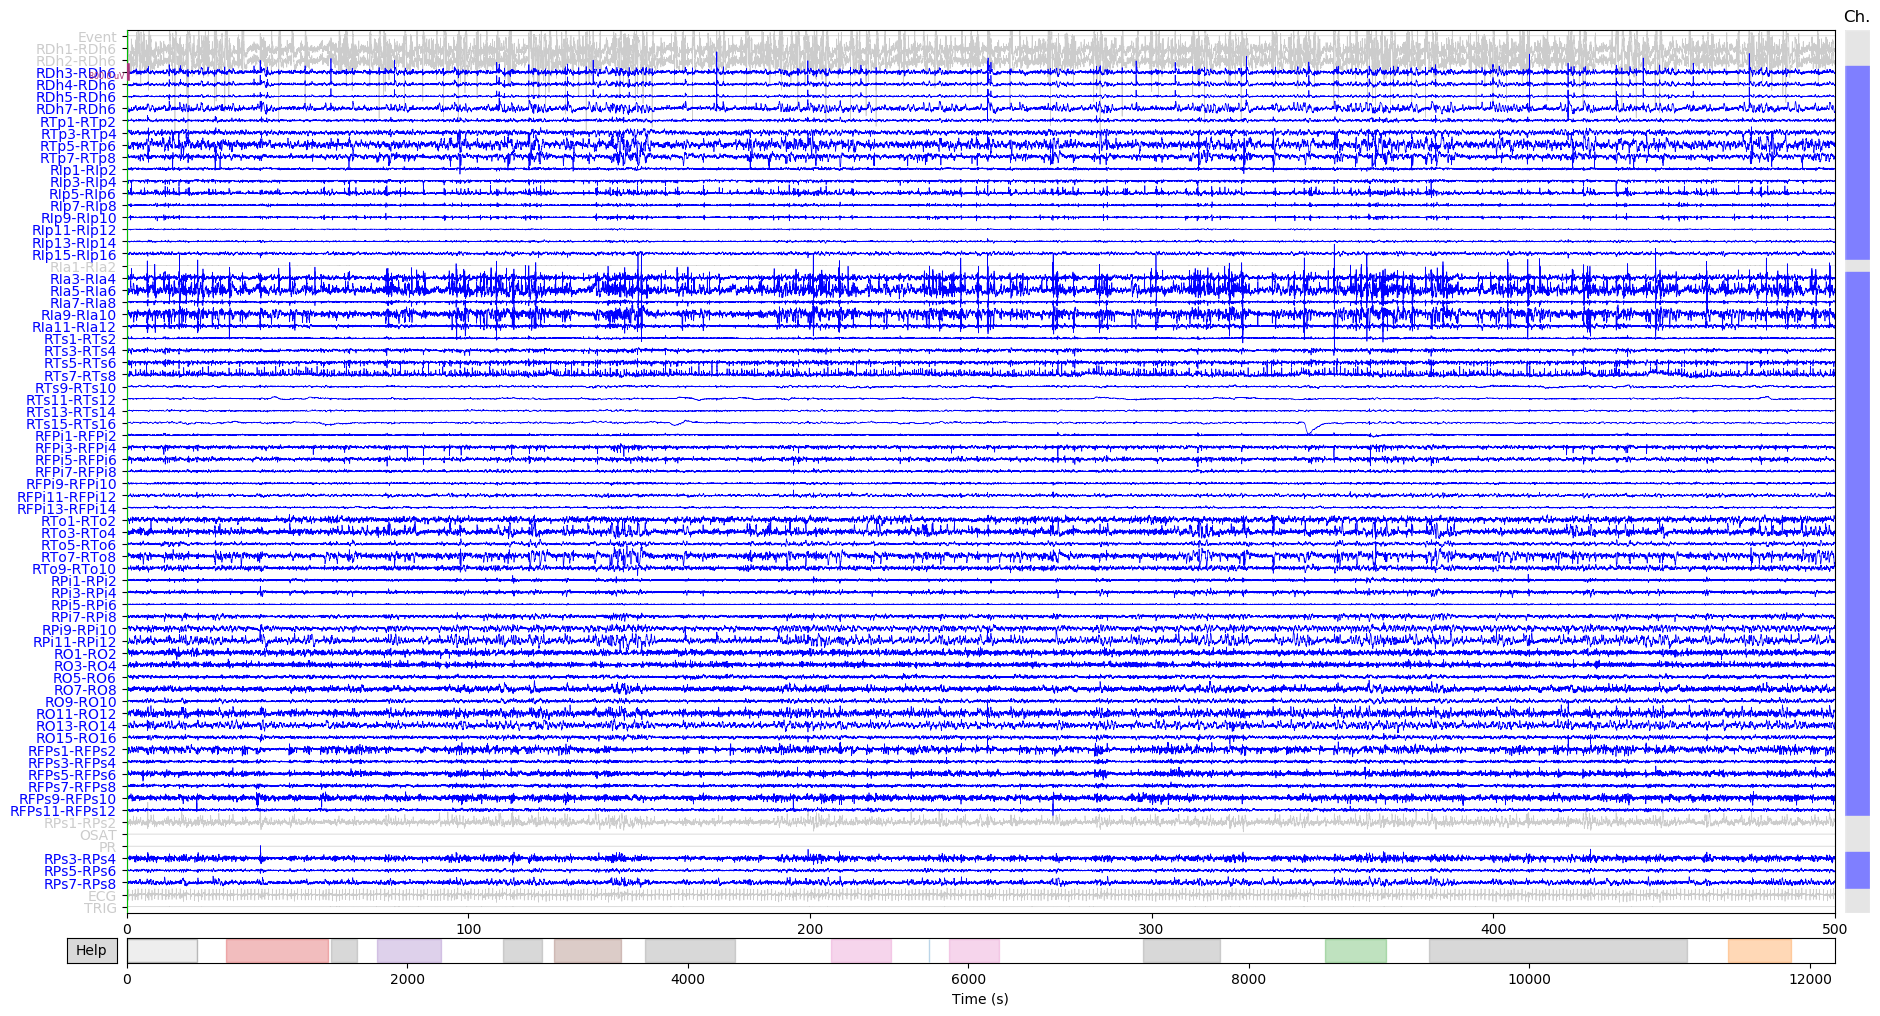

In [11]:
raw_annot.plot(duration=500, n_channels=73, scalings=4e-4, color='b', butterfly=False)

In [10]:
# Save annotation
# fsave = helper.CIFAR_filename(subid=subid, task='sleep', suffix='_annotated_raw.fif')
# fpath = cfsubdir.joinpath(fsave)
# fpath = os.fspath(fpath)
#raw.save(fpath, overwrite=True)

Overwriting existing file.
Writing /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_raw.fif
Closing /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_raw.fif [done]
Opening raw data file /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_raw.fif...
    Range : 0 ... 6088056 =      0.000 ... 12176.112 secs
Ready.


In [14]:
fsave = helper.CIFAR_filename(subid=subid, task='sleep', suffix='_annotated_raw.fif')
fpath = cfsubdir.joinpath(fsave)
fpath = os.fspath(fpath)
raw_annot = mne.io.read_raw_fif(fpath)

Opening raw data file /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_raw.fif...
    Range : 0 ... 6088056 =      0.000 ... 12176.112 secs
Ready.


In [12]:
#raw_annot.plot(duration=200, n_channels=73, scalings=4e-4, color='b', butterfly=False)

In [15]:
(events,
 event_dict) = mne.events_from_annotations(raw_annot, chunk_duration=20)

Used Annotations descriptions: ['boundary', 'end', 'other', 'stage 1', 'stage 2', 'stage 3', 'stage 4', 'transition']


In [23]:
event_dict

{'boundary': 1,
 'end': 2,
 'other': 3,
 'stage 1': 4,
 'stage 2': 5,
 'stage 3': 6,
 'stage 4': 7,
 'transition': 8}

In [16]:
epochs = mne.Epochs(raw_annot, events, tmin=- 0.2, tmax=20)

336 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [17]:
#epochs['7'].plot(n_epochs=5, scalings=4e-4, butterfly=False)

In [6]:
raw_crop2 = raw.copy().crop(tmin=3000.0, tmax=3200.0)
raw_crop2 = raw_crop2.load_data()
raw_pick2 = raw_crop2.copy().pick_channels(ch_names=picks)

Reading 0 ... 100000  =      0.000 ...   200.000 secs...


In [22]:
#raw_pick.plot(duration=30, n_channels=30, scalings=4e-4, color='b', butterfly=False)

In [41]:
#f, ax1 = plt.plot()
# stage1
psds, freqs = psd_multitaper(raw_pick, low_bias=True)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)

# stage2

psds2, freqs = psd_multitaper(raw_pick2, low_bias=True)
psds2 = 10 * np.log10(psds2)
psds2_mean = psds2.mean(0)

plt.plot(freqs, psds_mean, color='b')
plt.plot(freqs, psds2_mean, color='r')
plt.xscale('log')
plt.xlim(xmin=0.1)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


(0.1, 429.4218770651388)

In [32]:
new_events = mne.make_fixed_length_events(raw, duration=20)

In [35]:
epochs = mne.Epochs(raw, new_events, tmin=-0.2, tmax=10)

608 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [53]:
epochs_6 = epochs['6'].load_data()

Loading data for 24 events and 10101 original time points ...
0 bad epochs dropped


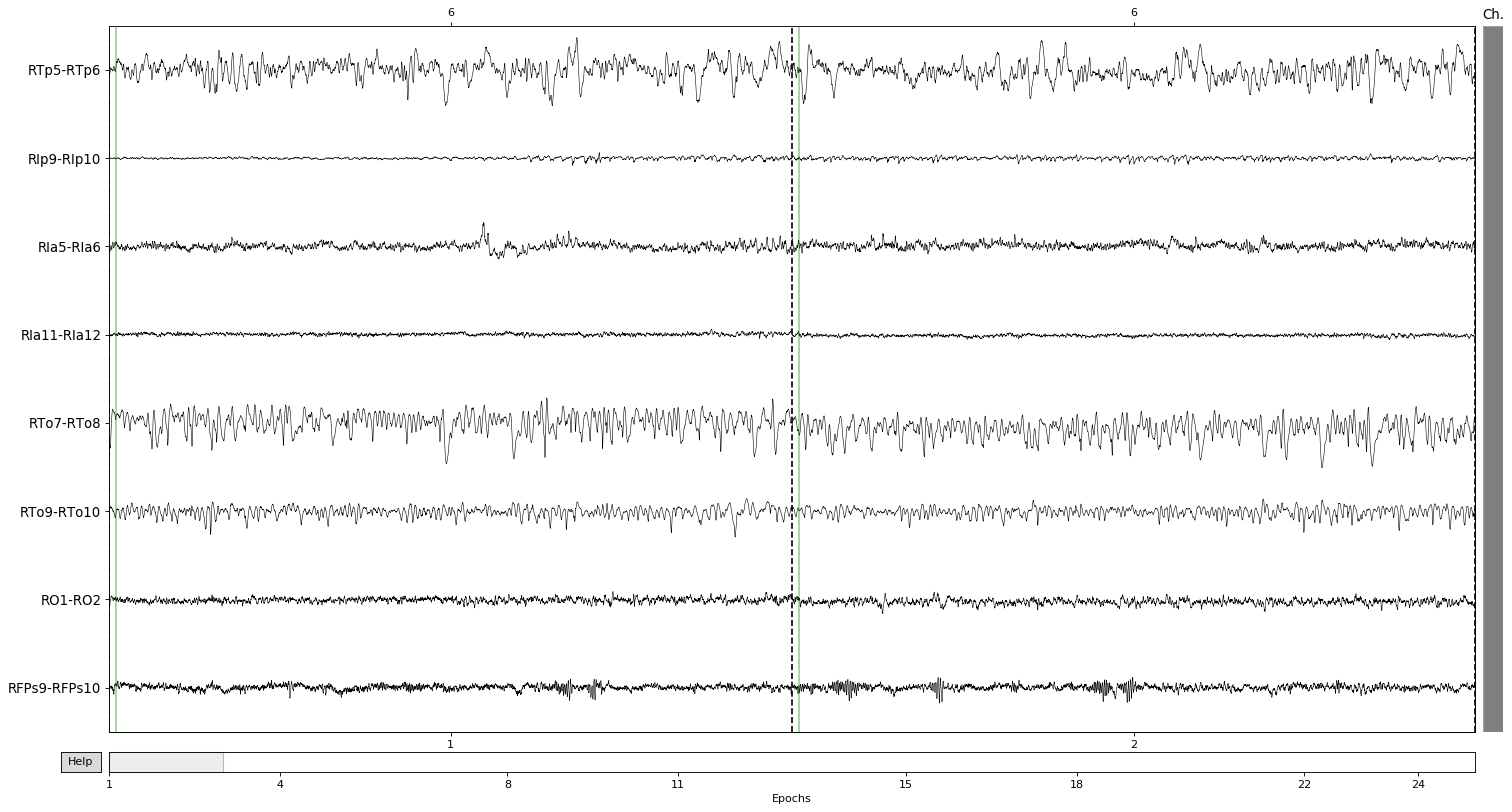

Dropped 0 epochs
Channels marked as bad: []


In [54]:
epochs_6.pick_channels(ch_names=picks).plot(n_epochs=2, scalings=4e-4, butterfly=False)

In [55]:
epochs_6.plot_psd(fmin=1, fmax=200, xscale='log',average=False)

    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: Image size of 224687x467 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 2 Axes>

In [27]:
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)

In [37]:
freqs = np.arange(5., 100., 3.)
ncycles = 2
power =  tfr_multitaper(epochs, freqs=freqs,
                       n_cycles=ncycles, return_itc=False)

Loading data for 9 events and 351 original time points ...


Applying baseline correction (mode: mean)


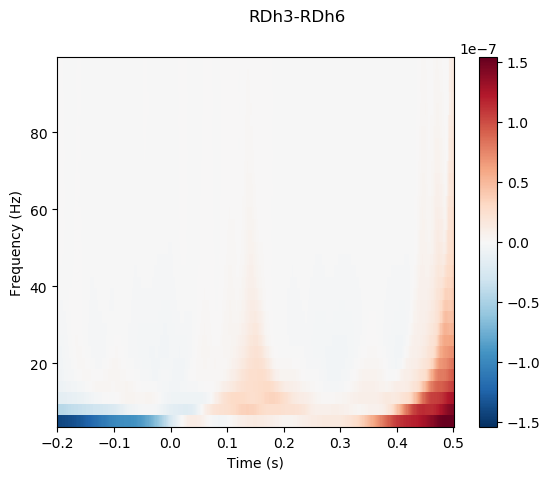

In [38]:
power.plot([0], baseline=(0., 0.1), mode='mean', show=False,
               colorbar=True)

In [47]:
epochs.plot(n_epochs=20, scalings=4e-4, butterfly=False)

In [75]:
#epochs.plot_psd(xscale='log', color='b', average=False)

Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RIa1-RIa2', 'RDh2-RDh6', 'RDh1-RDh6', 'RPs1-RPs2']
